# Startup Profit Prediction
### by: Mahmoud Limam  

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import style
import warnings
warnings.filterwarnings(action="ignore")

In [9]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [10]:
style.use('seaborn-darkgrid')

# Analysis & Processing

In [11]:
data = pd.read_csv("/content/50_Startups.csv")

In [12]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [15]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [16]:
continuous=list(data.columns)
continuous.remove("State")
continuous

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

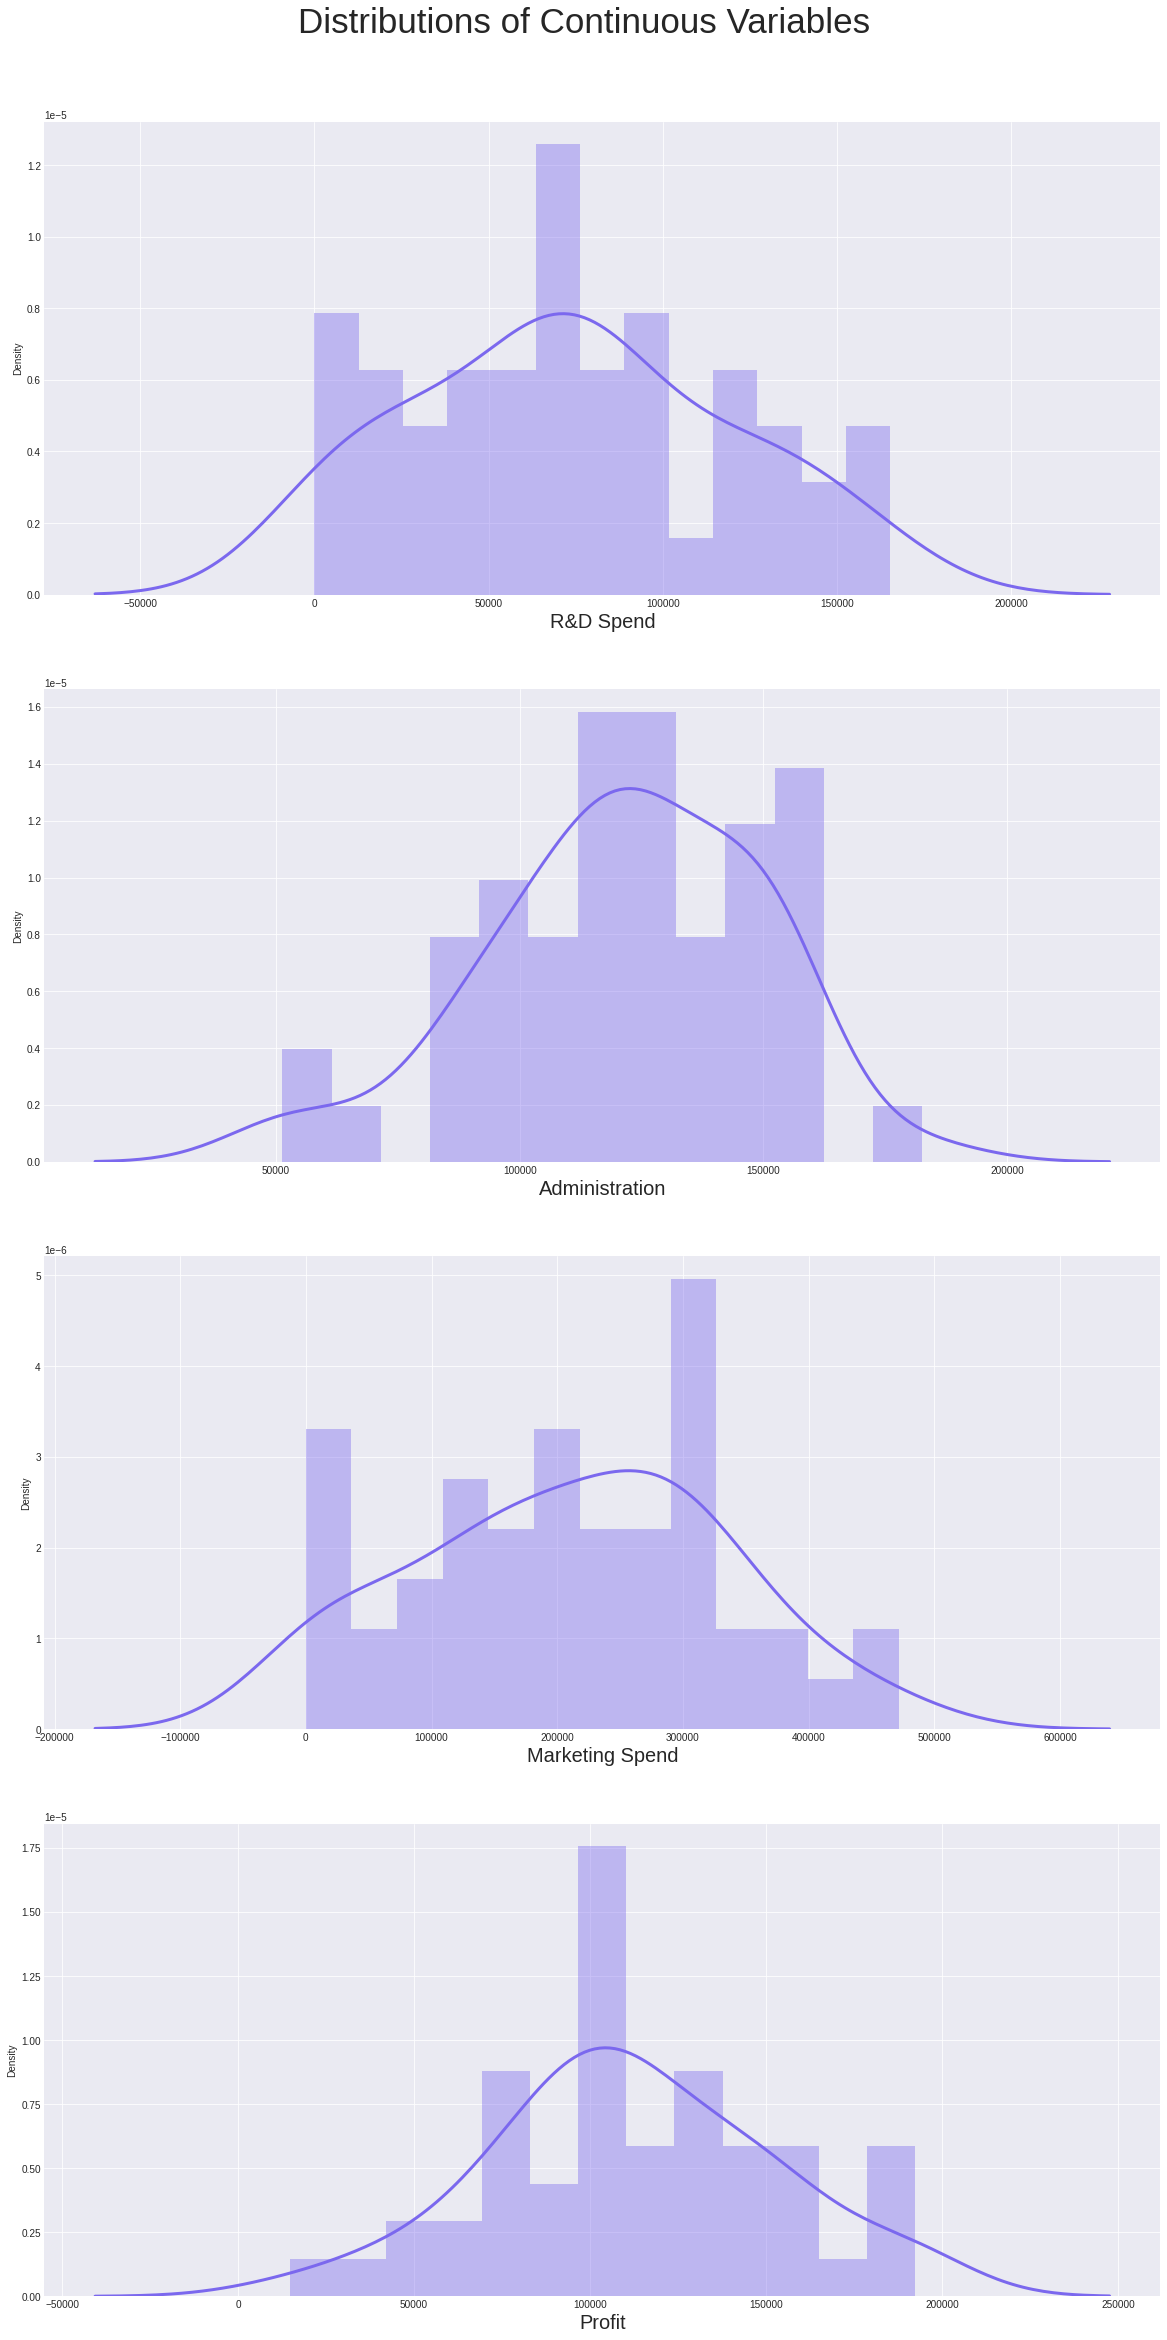

In [17]:
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,40))
for col in continuous:
    i = continuous.index(col)
    sns.distplot(data[col], ax=axes[i], bins=13, kde_kws={"lw":3}, color="mediumslateblue")
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=20)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=10)
figure.suptitle("Distributions of Continuous Variables", fontsize=35, y=0.92)
plt.show()

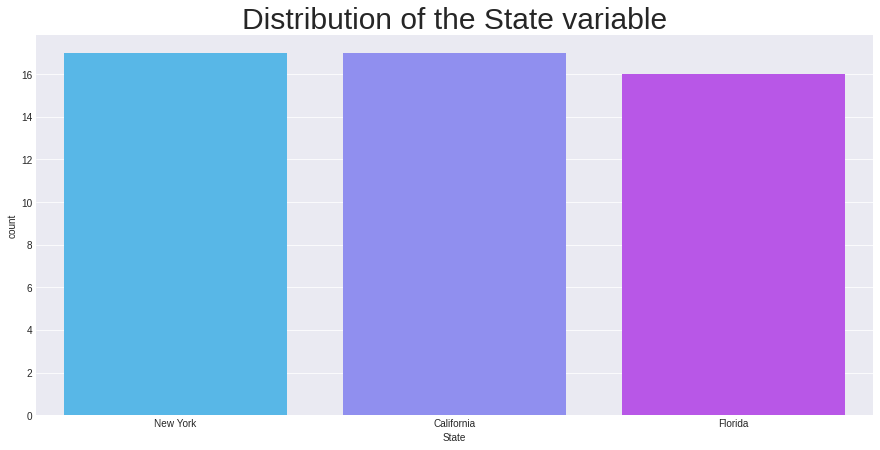

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(data=data, x="State", palette="cool")
plt.title("Distribution of the State variable", fontsize=30)
plt.show()

Skewness of R&D Spend: 0.164002172321177
Skewness of Administration: -0.4890248099671768
Skewness of Marketing Spend: -0.04647226758360412
Skewness of Profit: 0.023291019769116614


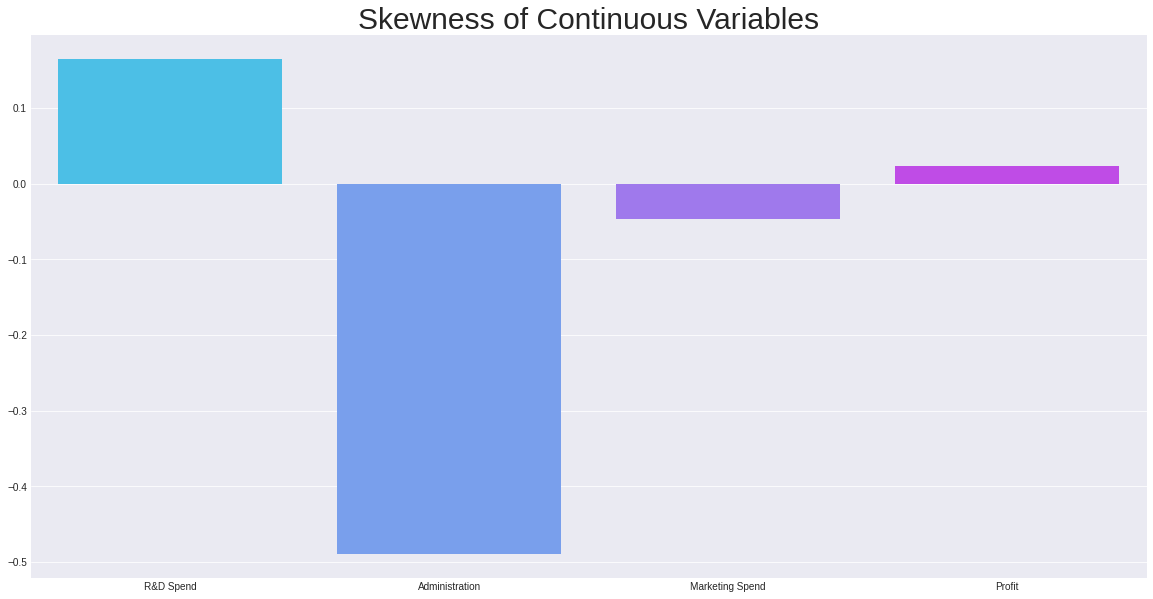

In [19]:
plt.figure(figsize=(20,10))
sk=dict()
for col in data.columns:
    if col!="State":
        skewness = data[col].skew()
        print(f"Skewness of {col}: {skewness}")
        sk[col]=skewness
sns.barplot(x=list(sk.keys()), y=list(sk.values()), palette="cool")
plt.title("Skewness of Continuous Variables", fontsize=30)
plt.show()

All features are approximately symmetric: Skewness is less than 0.5 (in absolute value).

Kurtosis of R&D Spend: -0.7614645568424674
Kurtosis of Administration: 0.22507113536865386
Kurtosis of Marketing Spend: -0.6717011281297514
Kurtosis of Profit: -0.06385888546853113


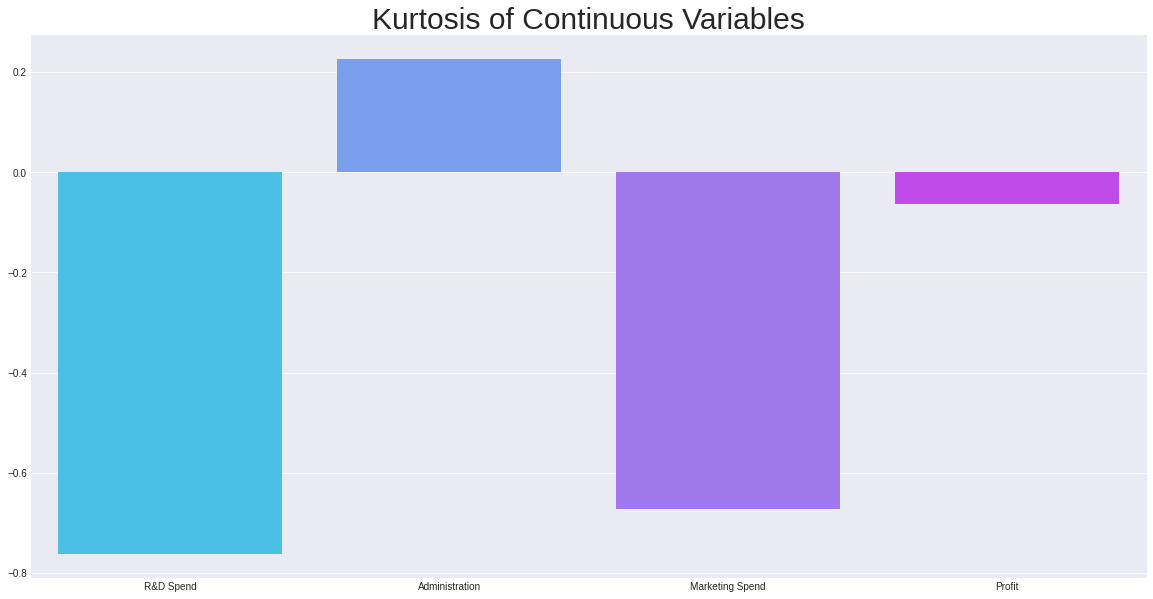

In [20]:
plt.figure(figsize=(20,10))
kr=dict()
for col in data.columns:
    if col!="State":
        kurtosis = data[col].kurt()
        print(f"Kurtosis of {col}: {kurtosis}")
        kr[col]=kurtosis
sns.barplot(x=list(kr.keys()), y=list(kr.values()), palette="cool")
plt.title("Kurtosis of Continuous Variables", fontsize=30)
plt.show()

Kurtosis is significantly less than 3 for all features.  
We could say the distributions have somewhat "light" tails and thus we shouldn't worry about outliers.

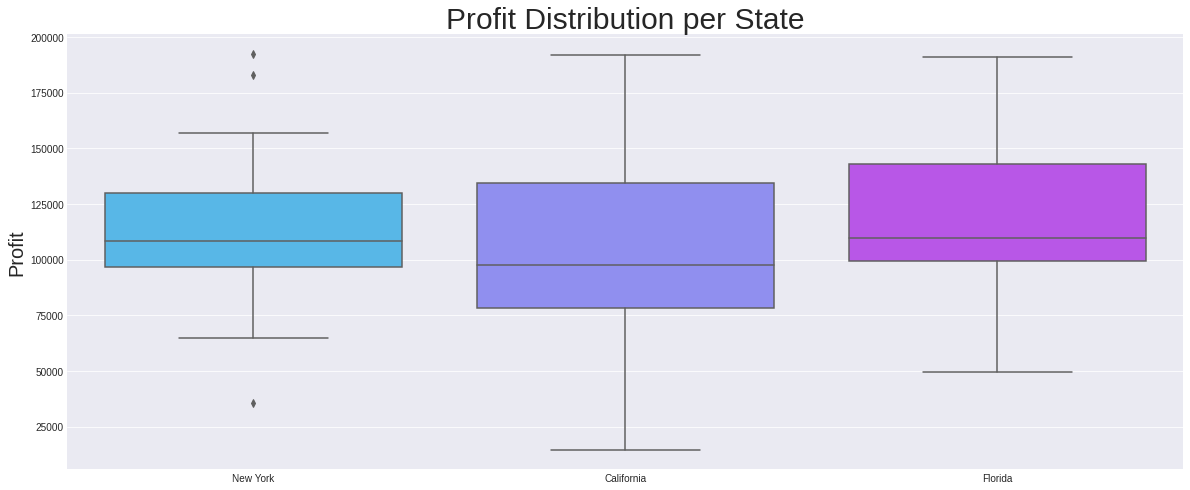

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot(y="Profit", data=data, x="State", palette="cool")
plt.xlabel(None)
plt.ylabel("Profit",fontsize=20)
plt.title("Profit Distribution per State", fontsize=30)
plt.show()

If the 3 states displayed profit distributions in 3 different ranges then it would be a good idea to do label encoding in such a way that the higher the label the higher the profit.  
I don't think Target Encoding would be a good idea as all 3 states have basically the same profit average.  
We'll go with One Hot Encoding.

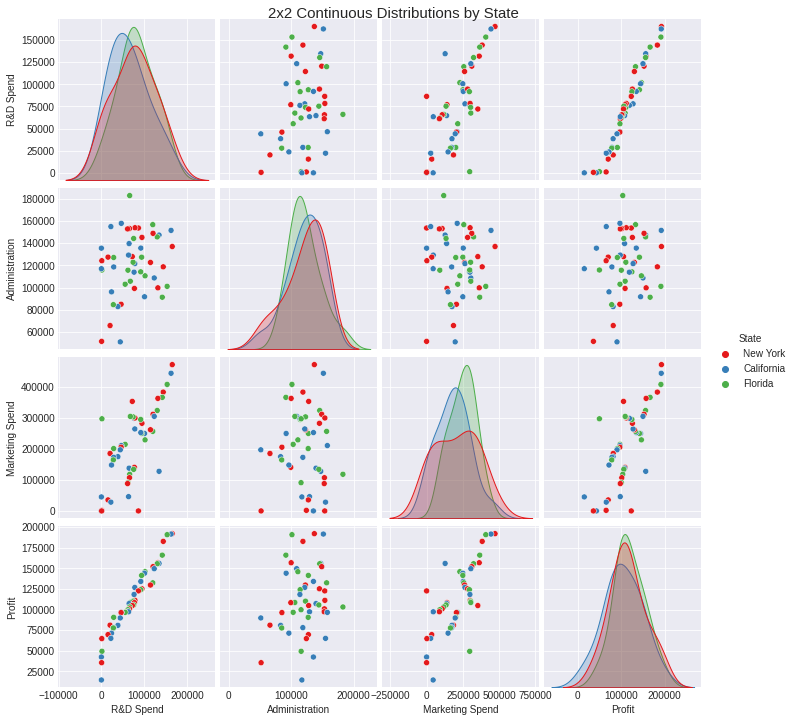

In [22]:
g=sns.pairplot(data, hue="State", palette="Set1", height=2.5)
g.fig.suptitle("2x2 Continuous Distributions by State\n", fontsize=15, y=1)
plt.show()

The target is quite correlated with "R&D Spend" and "Marketing Spend".  
The data points seem a little scattered though when it comes to the Profit-MarketingSpend plot, as opposed to the one with "R & D Spend".

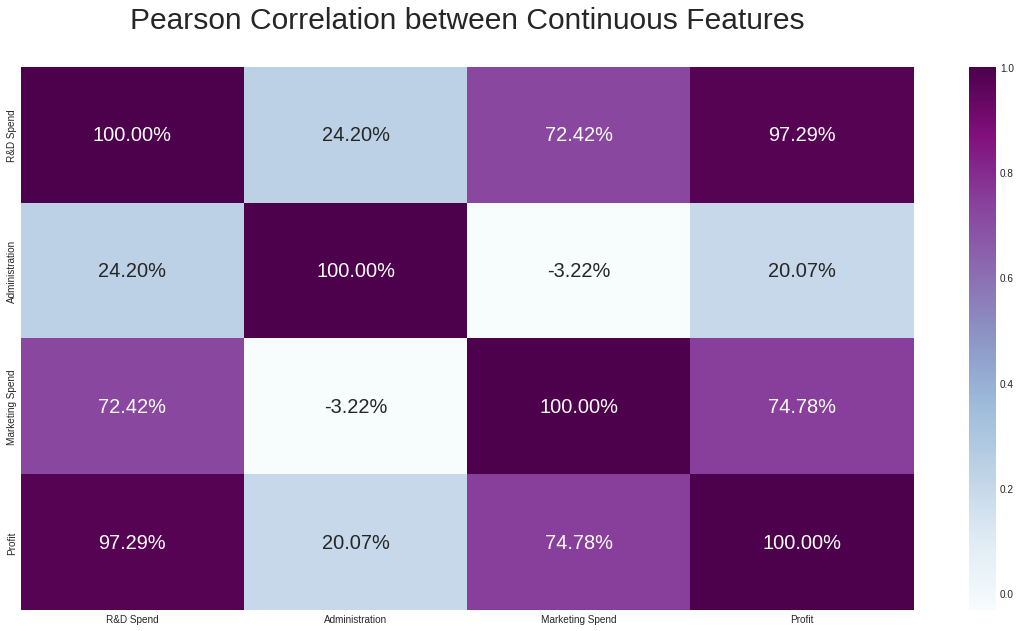

In [23]:
fig = plt.figure(figsize=(20,10))
corr = data.corr()
h = sns.heatmap(corr, annot=True, cmap="BuPu",annot_kws={'fontsize':20},fmt='.2%')
plt.title("Pearson Correlation between Continuous Features\n", fontsize=30)
plt.show()

In [24]:
from sklearn.feature_selection import mutual_info_classif as mic
from sklearn.feature_selection import mutual_info_regression as mir
from sklearn.metrics import mutual_info_score as mis

In [25]:
midata=pd.DataFrame(data.values, index=data.index, columns=data.columns)
midata["State"]=midata["State"].map({"California":0, "Florida":1, "New York":2})
mat = np.empty(shape=(5,5))
cols = list(data.columns)
for index in range(25):
    i, j = index//5, index%5
    coli = midata[cols[i]].values.reshape(-1,1)
    colj = midata[cols[j]].values.reshape(-1,1)
    if (cols[i]=="State" and cols[j]=="State"):
        mi = mis(coli.reshape(50,), colj.reshape(50,))
    elif (cols[i]=="State"):
        mi = mic(colj,coli)
    elif cols[j]=='State':
        mi = mic(coli, colj)
    else:
        mi = mir(coli,colj)
    mat[i,j]=mi
mi_mat = pd.DataFrame(mat, index=data.columns, columns=data.columns)
for col in data.columns:
    mi_mat.loc[col,col]=2.6
mi_mat = mi_mat/2.6

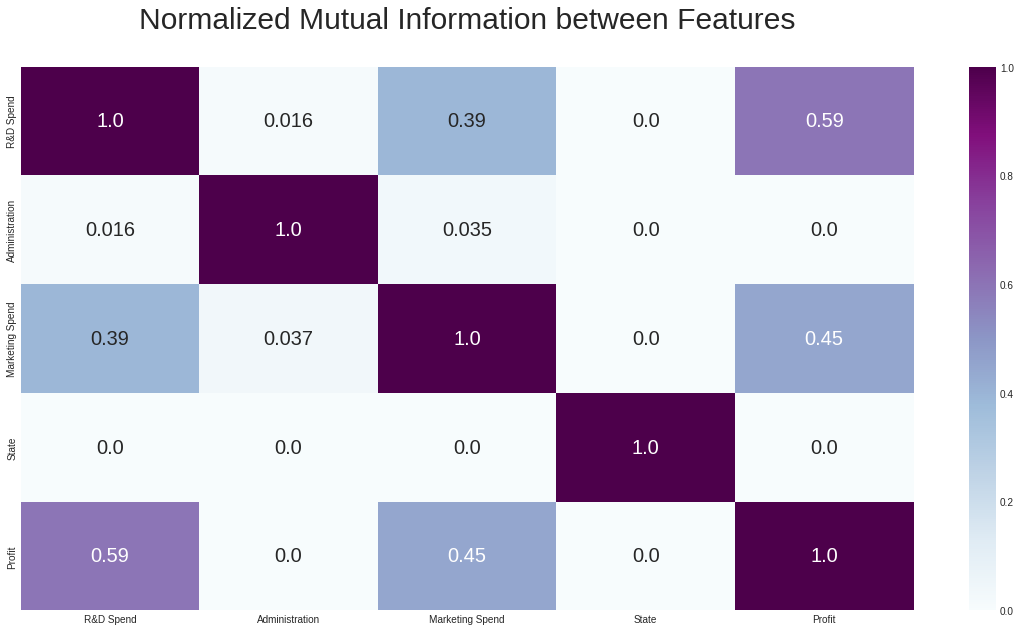

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(mi_mat, annot=True, annot_kws={"fontsize":20}, fmt=".2", cmap="BuPu")
plt.title("Normalized Mutual Information between Features\n", fontsize=30)
plt.show()

#### Note:
I didn't use SKLearn's Normalized Mutual Info function, i normalized the scores myself.  
I did so by simply dividing all values by the maximum value, which is the one between each variable and itself.  
The mutual information between the State variable and itself wasn't equal to the maximum value. This isn't wrong as it's actually entropy, but it could give the illusion that one variable is less dependent on itself than others are on themselves, which is absurd.  
I dealt with this by simply replacing it with the maximum value, which was 2.6.

In [27]:
data = pd.get_dummies(data, drop_first=True)

In [28]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Visualizing high-dimensional data with UMAP

In [29]:
# Install missing dependencies
#!pip install numpy scipy scikit-learn numba llvmlite
#!pip install umap-learn
# Import UMAP
from umap import UMAP


In [30]:
reducer = UMAP(random_state=11)

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
rs = RobustScaler()

In [33]:

datarr = rs.fit_transform(data.drop("Profit", axis=1))

In [34]:
umap_output = reducer.fit_transform(datarr)

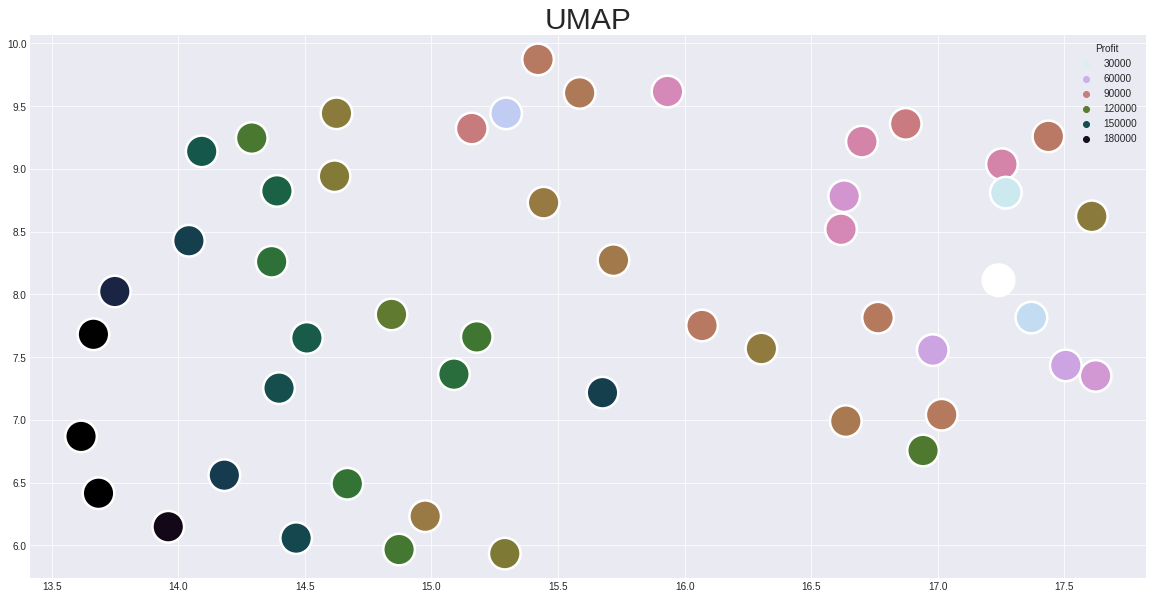

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=umap_output[:,0], y=umap_output[:,1], hue=data["Profit"], palette="cubehelix_r", s=1000)
plt.title("UMAP", fontsize=30)
plt.show()

##### This is very interesting.  
If you add a third dimension representing profit, you would see these points somewhat distributed across a plane.  
This can be guessed by observing the fact that on the embedding space, the data points increase in profit as you go towards the left, and slightly as you go downwards.  
#### Thus: A linear model should give very good results.

# Modelling with SKLearn

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
rs = RobustScaler()

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop("Profit", axis=1), data.Profit, test_size=0.2, random_state=0)

In [39]:
xtrain = rs.fit_transform(xtrain)
xtest = rs.transform(xtest)

#### Note:
I scaled variables after splitting in order to avoid data leakage.

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [41]:
lin_reg, ridge_reg, lasso_reg, elas_net = LinearRegression(), Ridge(), Lasso(), ElasticNet()

In [42]:
names = ['LinReg','Ridge', 'Lasso', 'ElasticNet']
model_list = [lin_reg, ridge_reg, lasso_reg, elas_net]

In [43]:
models = dict()
for n in names:
    models[n]=model_list[names.index(n)]

In [44]:
from sklearn.metrics import r2_score

In [45]:
scores = pd.DataFrame(data=np.empty(shape=(4,2)), index=models.keys(), columns=["Train","Test"])
for model, name in zip(models.values(), models.keys()):
    model.fit(xtrain, ytrain)
    ytrpred=model.predict(xtrain)
    ytspred=model.predict(xtest)
    train_r2 = r2_score(ytrain, ytrpred)
    test_r2 = r2_score(ytest, ytspred)
    scores.loc[name,'Train']=train_r2
    scores.loc[name,'Test']=test_r2

In [46]:
scores

,Train,Test
LinReg,0.950185,0.934707
Ridge,0.947481,0.910585
Lasso,0.950185,0.934755
ElasticNet,0.802233,0.642867


As expected, linear models gave impressive results.

# Backward Feature Elimination with Statsmodels

In [47]:
import statsmodels.api as sm

In [48]:
xtr = sm.add_constant(xtrain)

In [49]:
xts = sm.add_constant(xtest)

In [50]:
model = sm.OLS(ytrain, xtr).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.91e-21
Time:                        04:40:05   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.096e+05   2483.368     44.115      0.000    1.05e+05    1.15e+05
x1          4.913e+04   3502.865     14.025      0.000     4.2e+04    5.62e+04
x2          1072.7098   2168.222      0.495      0.624   -3333.647    5479.067
x3          6404.1828   3398.442      1.884      0.068    -502.282    1.33e+04
x4          -239.8210   1009.527     -0.238      0.814   -2291.427    1811.785
x5           699.3691   3661.563      0.191      0.850   -6741.822    8140.560
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model.pvalues

const    1.342112e-31
x1       1.068698e-15
x2       6.239644e-01
x3       6.807739e-02
x4       8.136498e-01
x5       8.496593e-01
dtype: float64

In [53]:
xtr = np.delete(xtr, 5, 1)

In [54]:
model = sm.OLS(ytrain, xtr).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.87e-22
Time:                        04:40:17   Log-Likelihood:                -421.12
No. Observations:                  40   AIC:                             852.2
Df Residuals:                      35   BIC:                             860.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.099e+05   1814.244     60.561      0.000    1.06e+05    1.14e+05
x1          4.925e+04   3396.887     14.498      0.000    4.24e+04    5.61e+04
x2          1039.6270   2131.336      0.488      0.629   -3287.215    5366.469
x3          6354.6835   3341.579      1.902      0.065    -429.082    1.31e+04
x4          -318.0402    909.945     -0.350      0.729   -2165.327    1529.247
==============================================================================
Omnibus:                       16.074   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.553
Skew:                          -1.086   Prob(JB):                     4.66e-06
Kurtosis:                       6.164   Cond. No.                         6.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model.pvalues

const    5.022314e-37
x1       2.305826e-16
x2       6.287461e-01
x3       6.546703e-02
x4       7.287964e-01
dtype: float64

In [57]:
xtr = np.delete(xtr, 4, 1)

In [58]:
model = sm.OLS(ytrain, xtr).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.85e-23
Time:                        04:40:23   Log-Likelihood:                -421.19
No. Observations:                  40   AIC:                             850.4
Df Residuals:                      36   BIC:                             857.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.095e+05   1523.151     71.916      0.000    1.06e+05    1.13e+05
x1          4.947e+04   3297.197     15.003      0.000    4.28e+04    5.62e+04
x2           958.7765   2092.754      0.458      0.650   -3285.525    5203.078
x3          6071.8563   3202.348      1.896      0.066    -422.807    1.26e+04
==============================================================================
Omnibus:                       15.557   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.539
Skew:                          -1.081   Prob(JB):                     1.28e-05
Kurtosis:                       5.974   Cond. No.                         2.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model.pvalues

const    1.720582e-40
x1       4.592579e-17
x2       6.496047e-01
x3       6.600037e-02
dtype: float64

In [61]:
xtr = np.delete(xtr, 2, 1)

In [62]:
model = sm.OLS(ytrain, xtr).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     349.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           9.65e-25
Time:                        04:40:31   Log-Likelihood:                -421.30
No. Observations:                  40   AIC:                             848.6
Df Residuals:                      37   BIC:                             853.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.095e+05   1496.825     73.127      0.000    1.06e+05    1.12e+05
x1          5.009e+04   2973.413     16.846      0.000    4.41e+04    5.61e+04
x2          5698.6214   3063.744      1.860      0.071    -509.114    1.19e+04
==============================================================================
Omnibus:                       14.666   Durbin-Watson:                   2.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.582
Skew:                          -1.030   Prob(JB):                     3.39e-05
Kurtosis:                       5.847   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model.pvalues

const    1.263838e-41
x1       6.120366e-19
x2       7.084678e-02
dtype: float64

In [65]:
xtr=np.delete(xtr,2,1)

In [66]:
model = sm.OLS(ytrain, xtr).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.56e-25
Time:                        04:40:36   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.092e+05   1540.082     70.937      0.000    1.06e+05    1.12e+05
x1          5.409e+04   2117.764     25.542      0.000    4.98e+04    5.84e+04
==============================================================================
Omnibus:                       13.132   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.254
Skew:                          -0.991   Prob(JB):                     0.000295
Kurtosis:                       5.413   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.pvalues

const    5.388344e-42
x1       1.562780e-25
dtype: float64

In [69]:
spend = data["R&D Spend"]

In [70]:
xtr = np.delete(xtr, 0, 1)

In [71]:
xts.shape

(10, 6)

In [72]:
xts = np.delete(xts, [0,2,3,4,5] ,1)

In [73]:
scores_after_selection = pd.DataFrame(data=np.empty(shape=(4,2)), index=models.keys(), columns=["Train","Test"])
for model, name in zip(models.values(), models.keys()):
    model.fit(xtr, ytrain)
    ytrpred=model.predict(xtr)
    ytspred=model.predict(xts)
    train_r2 = r2_score(ytrain, ytrpred)
    test_r2 = r2_score(ytest, ytspred)
    scores_after_selection.loc[name,'Train']=train_r2
    scores_after_selection.loc[name,'Test']=test_r2

In [74]:
print(f"R2_Scores before Elimination:\n\n{scores}\n\n\n\n")
print(f"R2_Scores after Elimination:\n\n{scores_after_selection}")

R2_Scores before Elimination:

               Train      Test
LinReg      0.950185  0.934707
Ridge       0.947481  0.910585
Lasso       0.950185  0.934755
ElasticNet  0.802233  0.642867




R2_Scores after Elimination:

               Train      Test
LinReg      0.944959  0.946459
Ridge       0.943034  0.942206
Lasso       0.944959  0.946457
ElasticNet  0.721768  0.680558


We can see that, although training scores decreased, testing scores increased.  

### Bonus: Fitting linear models on the output of UMAP

In [75]:
umap_tr, umap_ts, ytrain, ytest = train_test_split(umap_output, data["Profit"], random_state=112)

In [76]:
umap_tr = rs.fit_transform(umap_tr)
umap_ts = rs.transform(umap_ts)

In [77]:
scores_on_umap = pd.DataFrame(data=np.empty(shape=(4,2)), index=models.keys(), columns=["Train","Test"])
for model, name in zip(models.values(), models.keys()):
    model.fit(umap_tr, ytrain)
    ytrpred=model.predict(umap_tr)
    ytspred=model.predict(umap_ts)
    train_r2 = r2_score(ytrain, ytrpred)
    test_r2 = r2_score(ytest, ytspred)
    scores_on_umap.loc[name,'Train']=train_r2
    scores_on_umap.loc[name,'Test']=test_r2

In [78]:
scores_on_umap

,Train,Test
LinReg,0.704052,0.709580
Ridge,0.700608,0.735215
Lasso,0.704052,0.709611
ElasticNet,0.475525,0.569894


### Final Note:
As the number of samples is extremely low, different random states & seeds result in very different scores.  
Oversampling techniques would be very useful -if not necessary- if this dataset was to be used in a real-life project.